In [1]:
%matplotlib inline
%run "00-common"

import matplotlib.pyplot as plt
import sklearn.ensemble as en
import sklearn.model_selection as cv
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

df = pd.read_csv('../feature_selection.csv')
df.head()

,koi_period,koi_period_err1,koi_period_err2,koi_time0bk_err1,koi_time0bk_err2,koi_impact,koi_duration_err1,koi_duration_err2,koi_depth,koi_prad,koi_prad_err1,koi_prad_err2,koi_teq,koi_insol,koi_insol_err1,koi_insol_err2,koi_model_snr,koi_steff,koi_steff_err1,koi_steff_err2,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,dec,koi_disposition
0,101.110701,0.000953,-0.000953,0.008060,-0.008060,0.0460,0.2100,-0.2100,878.1,1.61,0.10,-0.08,229.0,0.65,0.14,-0.11,24.1,4133.0,74.0,-82.0,0.023,-0.033,0.561,0.033,41.452209,1
1,4.800654,0.000004,-0.000004,0.000745,-0.000745,0.7850,0.0550,-0.0550,15304.0,16.91,6.01,-2.00,1347.0,778.45,793.72,-255.78,298.0,6715.0,161.0,-241.0,0.056,-0.224,1.241,0.441,38.999008,0
2,39.593105,0.000615,-0.000615,0.014000,-0.014000,0.0044,0.5980,-0.5980,156.6,1.22,0.51,-0.11,546.0,21.06,26.65,-6.05,5.7,6046.0,172.0,-218.0,0.044,-0.298,0.972,0.411,41.659611,0
3,31.158825,0.000057,-0.000057,0.001380,-0.001380,0.0290,0.0504,-0.0504,959.0,3.56,0.57,-0.46,639.0,39.46,17.49,-11.96,73.6,5951.0,107.0,-119.0,0.120,-0.120,1.155,0.184,38.710232,1
4,613.829050,0.032600,-0.032600,0.031900,-0.031900,0.2616,1.4000,-1.4000,148.2,2.85,1.25,-1.41,307.0,2.10,2.78,-1.62,10.2,5636.0,173.0,-148.0,0.459,-0.224,2.357,1.027,43.824032,0


base_estimator = learning algorithm to use to train the weak models. Normally Decision Tree

n_estimators = is the number of models to iteratively train.

learning_rate

In [2]:
y_kepler = df['koi_disposition']
X_kepler = df.drop('koi_disposition', axis=1)
(X_train, X_test, y_train, y_test) = cv.train_test_split(X_kepler, y_kepler, test_size=.3, stratify = y_kepler, random_state=1)

In [3]:
# By default uses Decision Trees
abc = en.AdaBoostClassifier()
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)
print("Confusion matrix on test set:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy on test set: ", accuracy_score(y_test, y_pred))

Confusion matrix on test set:
 [[383  25]
 [ 25 167]]

Accuracy on test set:  0.9166666666666666


In [4]:
learning_rate = [round(x,1) for x in np.arange(0.1, 1.9, 0.2)]
n_estimators = list(range(10, 100, 10))

params = {
    'learning_rate': learning_rate,
    'n_estimators': n_estimators  
}

abc = en.AdaBoostClassifier()
gs = GridSearchCV(estimator = abc, param_grid = params, cv = 5, n_jobs = -1, scoring='f1')
gs.fit(X_train, y_train)

parval = gs.best_params_
scores = gs.cv_results_['mean_test_score']
scores = np.array(scores).reshape(len(params['learning_rate']), len(params['n_estimators']))


Best combination of parameters found:  {'learning_rate': 0.5, 'n_estimators': 60}

F1 score of best parameters:  0.8743692667650302


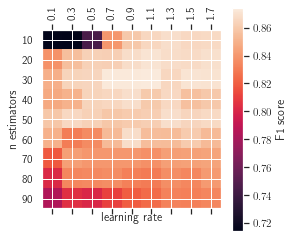

In [7]:
plt.matshow(scores)
plt.xlabel('learning rate')
plt.ylabel('n estimators')
plt.colorbar(label='F1 score')
plt.xticks(np.arange(len(params['learning_rate'])), params['learning_rate'], rotation='vertical')
plt.yticks(np.arange(len(params['n_estimators'])), params['n_estimators'])
plt.savefig("../figures/boosting.pdf")

parval=gs.best_params_
print("\nBest combination of parameters found: ", parval)
print("\nF1 score of best parameters: ", gs.best_score_)

In [9]:
abc = en.AdaBoostClassifier(**parval)
abc.fit(X_train, y_train)
y_pred = abc.predict(X_test)

print("Confusion matrix on test set:\n", confusion_matrix(y_test, y_pred))
print("\nAccuracy on test set: ", accuracy_score(y_test, y_pred))
print("\nF1 score on test set: ", f1_score(y_test, y_pred))

Confusion matrix on test set:
 [[383  25]
 [ 21 171]]

Accuracy on test set:  0.9233333333333333

F1 score on test set:  0.8814432989690721
